# Sentiment Analysis on Movie Reviews

https://www.kaggle.com/c/sentiment-analysis-on-movie-reviews/data

In [1]:
import tensorflow as tf

keras = tf.keras

tf.__version__

'2.5.0'

# Prepare Data

In [2]:
import pandas as pd
train_data = pd.read_csv('../input/sentiment-analysis-on-movie-reviews/train.tsv.zip', sep = '\t')
print(train_data.Phrase[0])
print(train_data.Phrase[1])
print(train_data.Phrase[2])
train_data.head(5)

A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .
A series of escapades demonstrating the adage that what is good for the goose
A series


,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [3]:
print(train_data.Phrase[63])
train_data[62:64+5]

This quiet , introspective and entertaining independent is worth seeking .


,PhraseId,SentenceId,Phrase,Sentiment
62,63,1,.,2
63,64,2,"This quiet , introspective and entertaining in...",4
64,65,2,"This quiet , introspective and entertaining in...",3
65,66,2,This,2
66,67,2,"quiet , introspective and entertaining indepen...",4
67,68,2,"quiet , introspective and entertaining",3
68,69,2,quiet,2


In [4]:
test_data = pd.read_csv('../input/sentiment-analysis-on-movie-reviews/test.tsv.zip', sep = '\t')
test_data.head()

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine


In [5]:
sample_submission_data = pd.read_csv('../input/sentiment-analysis-on-movie-reviews/sampleSubmission.csv')
sample_submission_data.head()

,PhraseId,Sentiment
0,156061,2
1,156062,2
2,156063,2
3,156064,2
4,156065,2


In [6]:
split_size = int(len(train_data) * 0.8)

total_phrases = train_data.Phrase.to_numpy()
train_phrases = total_phrases[:split_size]
valid_phrases = total_phrases[split_size:]

total_sentiments = train_data.Sentiment.to_numpy()
train_sentiments = total_sentiments[:split_size]
valid_sentiments = total_sentiments[split_size:]

In [7]:
train_ds = tf.data.Dataset.from_tensor_slices((train_phrases, train_sentiments))
valid_ds = tf.data.Dataset.from_tensor_slices((valid_phrases, valid_sentiments))
total_ds = tf.data.Dataset.from_tensor_slices((total_phrases, total_sentiments))

for phrase, sentiment in train_ds.take(4):
    print(phrase, sentiment)
print()    
for phrase, sentiment in valid_ds.take(1):
    print(phrase, sentiment)    

tf.Tensor(b'A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .', shape=(), dtype=string) tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(b'A series of escapades demonstrating the adage that what is good for the goose', shape=(), dtype=string) tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(b'A series', shape=(), dtype=string) tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(b'A', shape=(), dtype=string) tf.Tensor(2, shape=(), dtype=int64)

tf.Tensor(b"he 's the best brush in the business", shape=(), dtype=string) tf.Tensor(4, shape=(), dtype=int64)


In [8]:
word_set = set()
lines = []
for line, _ in train_ds:
    line = line.numpy().decode('utf-8')
    lines.append(line)
    for w in line.split(' '):
        word_set.add(w)

print(len(word_set))
for index, w in enumerate(word_set):
    if index >= 10:
        break
    print(f'{index:3}: {w}')

16007
  0: 
  1: Ago
  2: goth-vampire
  3: threatens
  4: Represents
  5: flip-flop
  6: ills
  7: frank
  8: privy
  9: conveys


In [9]:
from tensorflow.keras.preprocessing.text import Tokenizer

local = True
# vocab_size = 1000
vocab_size = 5000
# vocab_size = 10000
if local:
    vocab_size = 1000
    
tokenizer = Tokenizer(num_words = vocab_size, oov_token = '<OOV>')
tokenizer.fit_on_texts(lines)
word_index = tokenizer.word_index
for index, (a, b) in enumerate(word_index.items()):
    if index >= 5:
        break
    print(a, b)

<OOV> 1
the 2
a 3
of 4
and 5


In [10]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [11]:
for line in lines:
    print(line)
    sequences = tokenizer.texts_to_sequences([line])[0]
    print(sequences)
    print([f'{id}: {reverse_word_index[id]}' for id in sequences])
    break

A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .
[3, 318, 4, 1, 1, 2, 1, 10, 52, 9, 46, 14, 2, 1, 9, 179, 46, 14, 2, 1, 65, 4, 79, 597, 1, 20, 516, 4, 79, 1, 6, 55, 4, 3, 43]
['3: a', '318: series', '4: of', '1: <OOV>', '1: <OOV>', '2: the', '1: <OOV>', '10: that', '52: what', '9: is', '46: good', '14: for', '2: the', '1: <OOV>', '9: is', '179: also', '46: good', '14: for', '2: the', '1: <OOV>', '65: some', '4: of', '79: which', '597: occasionally', '1: <OOV>', '20: but', '516: none', '4: of', '79: which', '1: <OOV>', '6: to', '55: much', '4: of', '3: a', '43: story']


In [12]:
import numpy as np
sequences = tokenizer.texts_to_sequences(lines[:30])
np.max(list(map(len, sequences)))

maxlen = 50

In [13]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

def pad_f(sequences):
    return pad_sequences(sequences, maxlen = maxlen, padding = 'post', truncating = 'post')

In [14]:
batch_size = 32

def tokenize_and_pad_sequence(text_batch):
    texts = map(lambda t: t.numpy().decode('utf-8'), text_batch)
    sequences = tokenizer.texts_to_sequences(texts)
    return pad_f(sequences)
    
# https://www.tensorflow.org/api_docs/python/tf/function
@tf.function
def encode_text_batch(text_batch):
    return tf.py_function(
        func = tokenize_and_pad_sequence,
        inp = [text_batch],
        Tout = tf.int32,
    )

def create_batch_ds_inner(ds):
    ds = ds.batch(batch_size)
    ds = ds.map(lambda text_batch, label_batch: (encode_text_batch(text_batch), label_batch))
    return ds.cache()

def create_batch_ds(ds, do_shuffle = True):
    ds = create_batch_ds_inner(ds)
    if do_shuffle:
        ds = ds.shuffle(100)
    return ds.prefetch(tf.data.AUTOTUNE)

for text, _ in train_ds:
    print(text)
    break
    
train_batch_ds = create_batch_ds(train_ds)
valid_batch_ds = create_batch_ds(valid_ds, do_shuffle = False)
total_batch_ds = create_batch_ds(total_ds, do_shuffle = False)

for text_batch, label_batch in create_batch_ds(train_ds, do_shuffle = False).take(1):
    print(label_batch.shape)
    print(text_batch.shape)
    print(text_batch[0])
    for index in text_batch[0]:
        index = index.numpy()
        if index > 0:
            print(f'{index}: {reverse_word_index[index]}')
    

tf.Tensor(b'A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .', shape=(), dtype=string)
(32,)
(32, 50)
tf.Tensor(
[  3 318   4   1   1   2   1  10  52   9  46  14   2   1   9 179  46  14
   2   1  65   4  79 597   1  20 516   4  79   1   6  55   4   3  43   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0], shape=(50,), dtype=int32)
3: a
318: series
4: of
1: <OOV>
1: <OOV>
2: the
1: <OOV>
10: that
52: what
9: is
46: good
14: for
2: the
1: <OOV>
9: is
179: also
46: good
14: for
2: the
1: <OOV>
65: some
4: of
79: which
597: occasionally
1: <OOV>
20: but
516: none
4: of
79: which
1: <OOV>
6: to
55: much
4: of
3: a
43: story


# Build and Train Model

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_item(history_df, colname = 'loss', f = np.min, ax = None):
    val_colname = f'val_{colname}'
    print(f'{colname}: {f(history_df[colname]):.4f} - {val_colname}: {f(history_df[val_colname]):.4f}')
    history_df.loc[:, [colname, val_colname]].plot(title = colname.capitalize() , ax = ax)

def show_history(history):
    history_df = pd.DataFrame(history.history)
    
    fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 5))
    plot_item(history_df, 'loss', ax = axes[0])
    plot_item(history_df, 'accuracy', ax = axes[1], f = np.max)

In [16]:
def fit_model(model, train_batch_ds = train_batch_ds, epochs = 500, patience = 2):
    model.compile(
        optimizer = 'adam',
        loss = keras.losses.SparseCategoricalCrossentropy(from_logits = True),
        metrics = ['accuracy'],
    )

    early_stopping = keras.callbacks.EarlyStopping(
        patience = patience,
        restore_best_weights = True,
    )

    history = model.fit(
        train_batch_ds, 
        validation_data = valid_batch_ds,
        epochs = epochs,
        callbacks = [early_stopping],
    )
    return history 

## DNN

In [17]:
embedding_dim = 20

if local:
    embedding_dim = 16

# word size: 1000
#   6: val_accuracy: 0.5685
#   16: val_accuracy: 0.5709
#   32: val_accuracy: 0.5696
model_dnn = keras.Sequential([
    keras.layers.Embedding(vocab_size, embedding_dim, input_length = maxlen),
    keras.layers.GlobalAveragePooling1D(),
    keras.layers.Dense(16, activation = 'relu'),
    keras.layers.Dense(5),
])
model_dnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 50, 16)            16000     
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 85        
Total params: 16,357
Trainable params: 16,357
Non-trainable params: 0
_________________________________________________________________


Epoch 1/500
3902/3902 [==============================] - 23s 6ms/step - loss: 1.2331 - accuracy: 0.5187 - val_loss: 1.2327 - val_accuracy: 0.4985
Epoch 2/500
3902/3902 [==============================] - 3s 711us/step - loss: 1.1775 - accuracy: 0.5321 - val_loss: 1.1957 - val_accuracy: 0.5164
Epoch 3/500
3902/3902 [==============================] - 3s 712us/step - loss: 1.1138 - accuracy: 0.5581 - val_loss: 1.1306 - val_accuracy: 0.5449
Epoch 4/500
3902/3902 [==============================] - 3s 705us/step - loss: 1.0632 - accuracy: 0.5783 - val_loss: 1.1042 - val_accuracy: 0.5592
Epoch 5/500
3902/3902 [==============================] - 3s 720us/step - loss: 1.0394 - accuracy: 0.5887 - val_loss: 1.0982 - val_accuracy: 0.5626
Epoch 6/500
3902/3902 [==============================] - 3s 721us/step - loss: 1.0288 - accuracy: 0.5942 - val_loss: 1.1032 - val_accuracy: 0.5606
Epoch 7/500
3902/3902 [==============================] - 3s 715us/step - loss: 1.0219 - accuracy: 0.5976 - val_loss: 1.

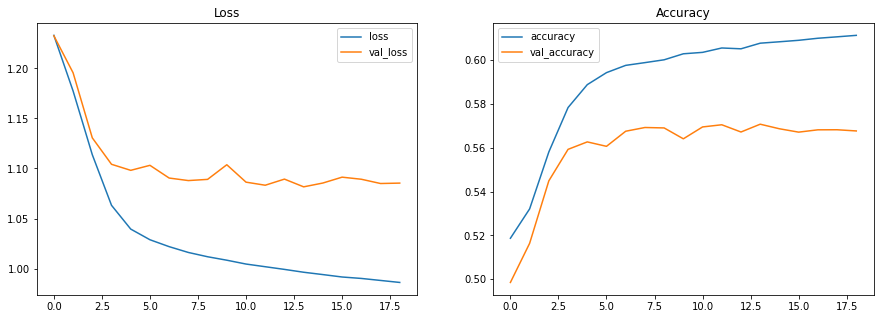

In [18]:
history_dnn = fit_model(model_dnn, patience = 5)  
show_history(history_dnn)

## LSTM

In [ ]:
model_lstm_bi = keras.Sequential([
    keras.layers.Embedding(vocab_size, embedding_dim, input_length = maxlen),
    keras.layers.Bidirectional(keras.layers.LSTM(embedding_dim)),
    keras.layers.Dense(16, activation = 'relu'),
    keras.layers.Dense(5),
])

model_lstm_bi.summary()

In [ ]:
history_lstm_bi = fit_model(model_lstm_bi, patience = 5)  
show_history(history_lstm_bi)

In [ ]:
model_lstm_multiple_bi = keras.Sequential([
    keras.layers.Embedding(vocab_size, embedding_dim, input_length = maxlen),
    keras.layers.Bidirectional(keras.layers.LSTM(embedding_dim, return_sequences = True)),
    keras.layers.Bidirectional(keras.layers.LSTM(embedding_dim)),
    keras.layers.Dense(16, activation = 'relu'),
    keras.layers.Dense(5),
])

model_lstm_multiple_bi.summary()

In [ ]:
history_lstm_multiple_bi = fit_model(model_lstm_multiple_bi, patience = 5)  
show_history(history_lstm_multiple_bi)

# Predict on Test Data

In [19]:
test_ds = tf.data.Dataset.from_tensor_slices(test_data.Phrase.to_numpy())
test_ds = test_ds.batch(batch_size)
test_ds = test_ds.map(lambda text_batch: encode_text_batch(text_batch))

for text_batch in test_ds.take(1):
    print(text_batch.shape)
    print(text_batch[0])

(32, 50)
tf.Tensor(
[ 17   1   1  20 588   1 429   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0], shape=(50,), dtype=int32)


In [20]:
predicted = model_dnn.predict(test_ds)

In [21]:
labels = list(map(tf.argmax, predicted))
labels = list(map(lambda x: x.numpy(), labels))

In [22]:
result_df = pd.DataFrame({'PhraseId': test_data.PhraseId, 'Sentiment': labels})
result_df.head()

,PhraseId,Sentiment
0,156061,2
1,156062,2
2,156063,2
3,156064,2
4,156065,2


In [23]:
result_df.to_csv('dnn_submission.csv', index = False)

In [24]:
def predict_and_write_csv(model, csv_name):
    predicted = model.predict(test_ds)
    labels = list(map(tf.argmax, predicted))
    labels = list(map(lambda x: x.numpy(), labels))
    result_df = pd.DataFrame({'PhraseId': test_data.PhraseId, 'Sentiment': labels})
    result_df.to_csv(csv_name, index = False)

predict_and_write_csv(model_dnn, 'dnn_submission.csv')    